# Dependencies

In [103]:
# import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests #This is used to request information from the API

# Performing Json.get request

In [88]:
# Specify the URL

request = requests.get("https://mcuapi.herokuapp.com/api/v1/movies")
request_text = request.text
data = json.loads(request_text)
#print(data)
print(data["data"][3]["title"])
print(data)





Thor
{'data': [{'id': 1, 'title': 'Iron Man', 'release_date': '2008-05-02', 'box_office': '585171547', 'duration': 126, 'overview': "2008's Iron Man tells the story of Tony Stark, a billionaire industrialist and genius inventor who is kidnapped and forced to build a devastating weapon. Instead, using his intelligence and ingenuity, Tony builds a high-tech suit of armor and escapes captivity. When he uncovers a nefarious plot with global implications, he dons his powerful armor and vows to protect the world as Iron Man.", 'cover_url': 'https://raw.githubusercontent.com/AugustoMarcelo/mcuapi/master/covers/iron-man.jpg', 'trailer_url': 'http://players.brightcove.net/5359769168001/BJemW31x6g_default/index.html?videoId=5786306590001', 'directed_by': 'Jon Favreau', 'phase': 1, 'saga': 'Infinity Saga', 'chronology': 3, 'post_credit_scenes': 1}, {'id': 2, 'title': 'The Incredible Hulk', 'release_date': '2008-06-13', 'box_office': '265573859', 'duration': 112, 'overview': "In this new beginning

# Creating Roles and Columns

In [89]:
release_date = []
chronology = []
title = [] 
box_office = []
duration = []

for movies in range(0,28):
    release_date.append(data["data"][movies]["release_date"])
    title.append(data["data"][movies]["title"])
    chronology.append(data["data"][movies]["chronology"])
    box_office.append(data["data"][movies]["box_office"])
    duration.append(data["data"][movies]["duration"])

    
movies_list = pd.DataFrame({"Title": title,
                            "Box Office (in 000s)": box_office,
                            "Release Date": release_date,
                            "Chronology":chronology,
                            "Duration":duration
                            
})   
movies_list["Box Office (in 000s)"] = movies_list["Box Office (in 000s)"].astype(float) / 1000
movies_list["Release Date"] = pd.to_datetime(movies_list["Release Date"])
movies_list
  

,Title,Box Office (in 000s),Release Date,Chronology,Duration
0,Iron Man,585171.547,2008-05-02,3.0,126
1,The Incredible Hulk,265573.859,2008-06-13,5.0,112
2,Iron Man 2,621156.389,2010-05-07,4.0,124
3,Thor,449326.618,2011-05-06,6.0,115
4,Captain America: The First Avenger,370569.776,2011-07-22,1.0,124
5,The Avengers,1517935.897,2012-05-04,7.0,143
6,Iron Man 3,1215392.272,2013-05-03,8.0,130
7,Thor: The Dark World,644602.516,2013-11-08,9.0,112
8,Captain America: The Winter Soldier,714401.889,2014-04-04,10.0,136
9,Guardians of the Galaxy,770867.516,2014-08-01,11.0,121


# Dropping $0 Values 

In [90]:
#Dropping $0 box office - movies haven't been released, ignore for analysis
released_movies = movies_list.loc[movies_list["Box Office (in 000s)"]> 0]
released_movies = released_movies.sort_values(['Box Office (in 000s)'], ascending = False)
released_movies

,Title,Box Office (in 000s),Release Date,Chronology,Duration
21,Avengers: Endgame,2795465.685,2019-04-26,22.0,182
18,Avengers: Infinity War,2048134.200,2018-04-27,20.0,149
5,The Avengers,1517935.897,2012-05-04,7.0,143
10,Avengers: Age of Ultron,1403013.963,2015-05-01,13.0,141
17,Black Panther,1348258.224,2018-02-16,16.0,134
6,Iron Man 3,1215392.272,2013-05-03,8.0,130
12,Captain America: Civil War,1140069.413,2016-05-06,15.0,147
20,Captain Marvel,1126129.839,2019-03-08,2.0,125
22,Spider-Man: Far From Home,1123901.180,2019-07-02,23.0,129
15,Spider-Man: Homecoming,880166.350,2017-07-07,17.0,133


In [95]:
#Formating Box Office
final_movies = released_movies.copy()
final_movies ["Box Office (in 000s)"] = final_movies ["Box Office (in 000s)"].map("${:,.2f}".format)
final_movies.to_csv("marvel_files/final_movies.csv")
final_movies 

,Title,Box Office (in 000s),Release Date,Chronology,Duration
21,Avengers: Endgame,"$2,795,465.69",2019-04-26,22.0,182
18,Avengers: Infinity War,"$2,048,134.20",2018-04-27,20.0,149
5,The Avengers,"$1,517,935.90",2012-05-04,7.0,143
10,Avengers: Age of Ultron,"$1,403,013.96",2015-05-01,13.0,141
17,Black Panther,"$1,348,258.22",2018-02-16,16.0,134
6,Iron Man 3,"$1,215,392.27",2013-05-03,8.0,130
12,Captain America: Civil War,"$1,140,069.41",2016-05-06,15.0,147
20,Captain Marvel,"$1,126,129.84",2019-03-08,2.0,125
22,Spider-Man: Far From Home,"$1,123,901.18",2019-07-02,23.0,129
15,Spider-Man: Homecoming,"$880,166.35",2017-07-07,17.0,133


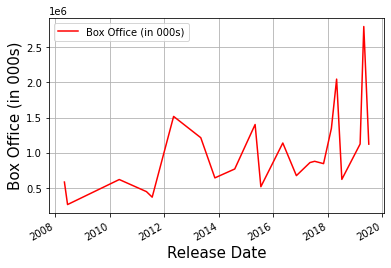

In [107]:
# box office earnings over time
TimeBox = released_movies.plot(kind = "line", x = "Release Date", y = "Box Office (in 000s)", color = "red", grid = True)
TimeBox.set_ylabel("Box Office (in 000s)", fontsize = 15, color = "black")
TimeBox.set_xlabel("Release Date", fontsize = 15, color = "black")
plt.show()

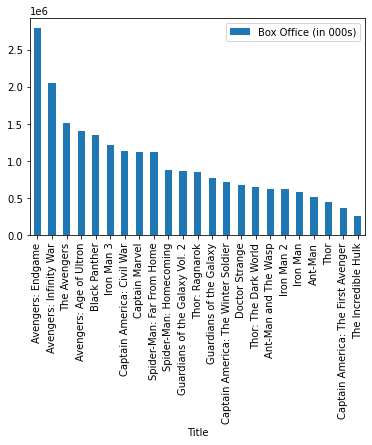

In [93]:
EarnBar = released_movies.plot(kind = "bar", x = "Title", y = "Box Office (in 000s)")